# Simulations 

#### Simulations are a major component in modern chemistry which refers to the use of computer programs to model and predict the behaviors of chemical sytems and reactions. Simulations are beside experimentation the major method for designing, analyzing and optimizing chemical process. The ability of stimulations to reflect real process behavior strongly depends on model quality. Simulations helps in understanding the molecular structure, properties and reactivity of chemical substances. This enables researcher to study complex chemical processes, design new materials and optimize reaction conditions.

#### Simulations do not need represent every aspect of the real world as long as the omitted details do not reduce the accuracy or precision to a level that the simulation is no longer useful. Modern chemical simulations are often quite complex and are performed with a range of free or commercial software. In this manuscript, we will discuss about different simulations with simple methodologies that can be easily coded in Python using standard libraries such as NumPy, SciPy and matplotlib.

## Deterministic Simulations

#### Deterministic simulations are computer based models that are use mathemaical algorigthms and equations to simulate and predict the behavior of complex systems. It simulate with no random variables with fixed outcomes dedicated by the code and input parameters. They produce same outcomes if they are run multiple times with same input and parameters. However, it is important to note that deternistic simulations are not always an accurate representation of real-world sytems, as they may not account for all factors that can affect the behavior of the system. Even though many physical and chemical process are driven by randomness, such as the random movements and collision of molecules, it makes the randomness conform to predictable pattern which can be seen in Nuclear Magnetic Resonance (NMR) spilliting pattern and chemical kinematics among many others below.



In [12]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def split(peaks, n, J, freq=400):
    '''(list, int, float, freq=num) -> list
    Takes in a list of peak ppm values for a single 
    resonance(peaks),the number of identical neighboring 
    protons(n), the coupling constant (J) in Hz, and the 
    frequency of observation (freq) in MHz and returns a 
    list of ppm values for all peaks in the splitting pattern.
    '''
    # check validity of input values
    if not isinstance(peaks, list):
        peaks = list([peaks])
    if not isinstance(n, int):
        print('Error: n must be an integer.')
        return None
    
    # split the peak(s)
    J_ppm  = J / freq
    new_peaks = []
    for peak in peaks:
        new_peaks.extend([peak + 0.5 * J_ppm, peak - 0.5 * J_ppm])
        
    n =n - 1
    
    # perform next split or return result
    if n > 0:
        return split(new_peaks, n, J, freq=freq)
    else:
        return new_peaks
split(1.00, 2, J=3.4, freq=400)

[1.0085000000000002, 1.0, 1.0, 0.9915]

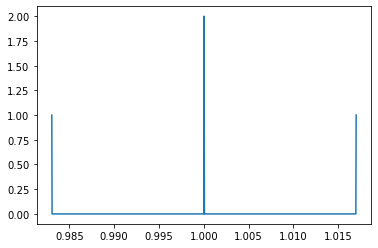

In [23]:
signal, ppm = np.histogram(split([1.00], 2, J=6.8), bins=1000)
plt.plot(ppm[1:], signal)